# Regresion lineal : Costo de un incidente de seguridad

En este caso se explican los fundamentos de la regresion lineal aplicada a un caso de un sencillo uso relacionado con la ciberseguridad

### Enunciado del ejercicio
El ejercicio consiste en predecir el costo de un incidente de seguridad en base al numero de equipos afectados en un DataSet aleatorio

### 1.Generacion  del conjunto de datos

In [1]:
import numpy as np

X= 3* np.random.rand(100,1)
y= 4+3*X+np.random.rand(100,1)

print ("La longitud del conjunto de datos es: ",len(X))

La longitud del conjunto de datos es:  100


### 2. Visualizacion del DataSet

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

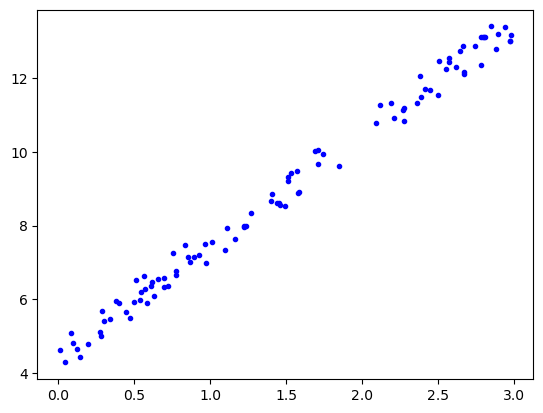

In [3]:
plt.plot(X,y,"b.")
plt.show()

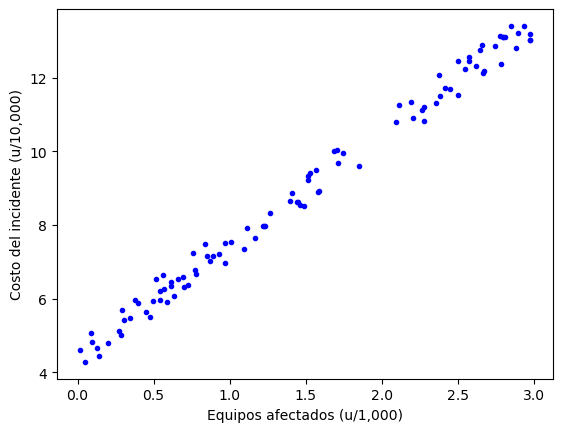

In [4]:
plt.plot(X,y,"b.")
plt.xlabel("Equipos afectados (u/1,000)")
plt.ylabel("Costo del incidente (u/10,000)")
plt.show()


### 3. Modificacion del conjuto de datos del DataSet

In [5]:
import pandas as pd

In [6]:
data= {"No_Equipo_Afectados": X.flatten(), "Costo": y.flatten()}
df = pd.DataFrame(data)
df.head(10)

,No_Equipo_Afectados,Costo
0,2.358657,11.320508
1,2.572883,12.447830
2,0.125910,4.650718
3,0.543691,6.202003
4,2.936748,13.407324
5,2.274902,11.201671
6,0.723998,6.359557
7,1.569151,9.497220
8,1.850005,9.615660
9,1.710300,9.683000


In [7]:
# Escalamiento del numero de equipos afectados.
df['No_Equipo_Afectados']= df['No_Equipo_Afectados'] * 1000
df['No_Equipo_Afectados']= df['No_Equipo_Afectados'].astype('int')
# Escalando costo
df['Costo']= df['Costo'] * 10000
df['Costo']= df['Costo'].astype('int')
df.head(10)

,No_Equipo_Afectados,Costo
0,2358,113205
1,2572,124478
2,125,46507
3,543,62020
4,2936,134073
5,2274,112016
6,723,63595
7,1569,94972
8,1850,96156
9,1710,96830


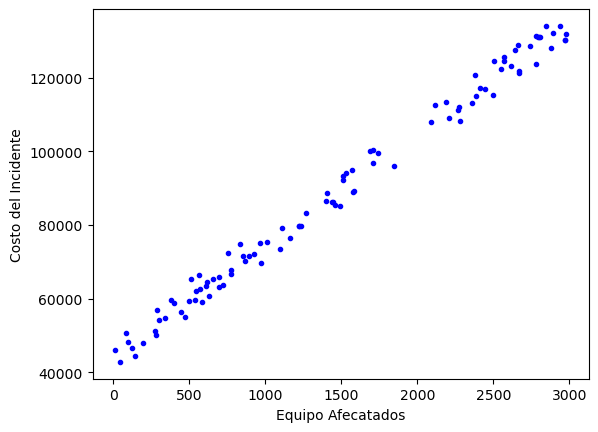

In [8]:
# Reprecentacion grafica del conjuto de datos
plt.plot(df['No_Equipo_Afectados'], df['Costo'], 'b.')
plt.xlabel('Equipo Afecatados')
plt.ylabel('Costo del Incidente')
plt.show()

### Construccion del Modelo

In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
# Construccion del Modelo y ajuste de la funcion de hipotesis
lin_reg = LinearRegression()
lin_reg.fit(df["No_Equipo_Afectados"].values.reshape(-1,1),df["Costo"].values)

LinearRegression()

In [11]:
# Parametro Theta 0
lin_reg.intercept_

44460.475041463156

In [12]:
# Parametro Theta 1
lin_reg.coef_

array([30.1922842])

In [13]:
# Prediccion para el valor minimo y maximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["No_Equipo_Afectados"].min()],[df["No_Equipo_Afectados"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

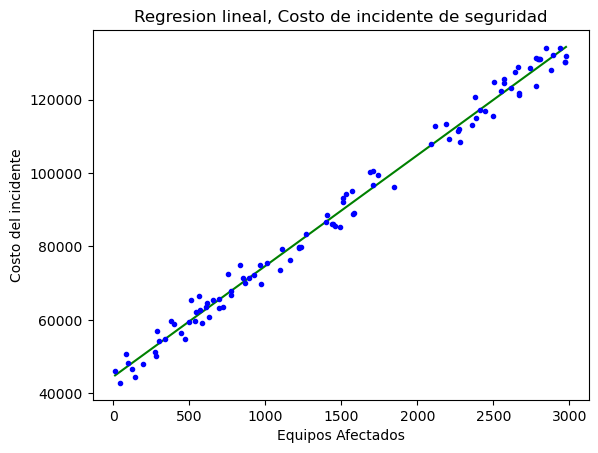

In [14]:
# Representacion grafica de la funcion de hipotesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df["No_Equipo_Afectados"],df["Costo"],"b.")
plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.title("Regresion lineal, Costo de incidente de seguridad")

plt.show()

## 5.  Prediccion de nuevos ejemplos

In [15]:
x_new= np.array([[2420]]) #1300 equipos afectados

# Prediccion del costo que tendria el incidente .
costo= lin_reg.predict(x_new)

print ("El costo del incidente seria: $ ",int(costo[0]))


El costo del incidente seria: $  117525


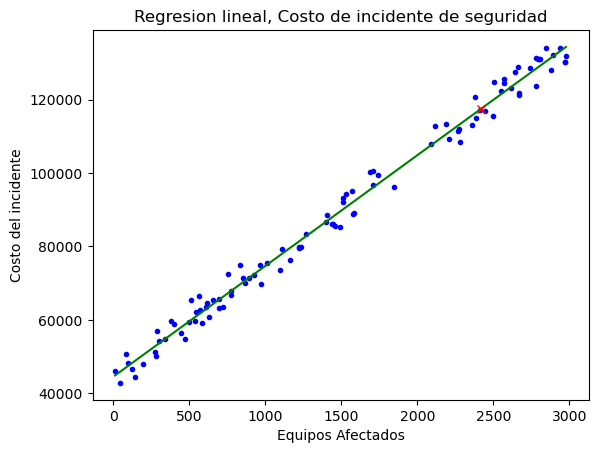

In [16]:
# Representacion grafica de la funcion de hipotesis generada
plt.plot(df["No_Equipo_Afectados"],df["Costo"],"b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new,costo,"rx")

plt.xlabel("Equipos Afectados")
plt.ylabel("Costo del incidente")
plt.title("Regresion lineal, Costo de incidente de seguridad")

plt.show()